# Regresión polinómica

En este notebook vamos a ver cómo ajustar un modelo de regresión polinómica a un conjunto de datos. Para ello, vamos a utilizar la librería `scikit-learn` de Python.

La regresión polinómica es un caso particular de regresión lineal en el que la relación entre la variable independiente $x$ y la variable dependiente $y$ se modela como un polinomio de grado $n$.

Por ejemplo a continuación mostramos unos datos de ejemplo y ajustamos un modelo de regresión polinómica de grado 2.

Si nos damos cuenta si utilizamos un modelo lineal no se ajusta bien a los datos, sin embargo si utilizamos un modelo polinómico de grado 2 se ajusta mucho mejor.

<div style="text-align: center">
<img src="./assets/regresion_polinomial.png" width="400">
</div>

La ecuación de un modelo de regresión polinómica de grado 2 es:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2
$$<>

In [1]:
# Instalación de librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [7]:
#númerica, vectores y matrices
import numpy as np
#tratamiento de datos
import pandas as pd
#graficación
import matplotlib.pyplot as plt
#colocamos la biblioteca para procesamiento polinomial
from sklearn.preprocessing import PolynomialFeatures
#biblioteca de regresión lineal
from sklearn.linear_model import LinearRegression

In [4]:
#generar los datos grado n
X=7*np.random.rand(100,1)-1
pd.DataFrame(X).head()


,0
0,2.790065
1,4.639478
2,1.559691
3,3.364417
4,0.296765


In [5]:
#generar la variable dependiente, Target
y=2*X**2+0.5*X+ np.random.randn(100,1)
pd.DataFrame(y).head()

,0
0,15.803072
1,44.926660
2,6.813750
3,23.900849
4,0.605436


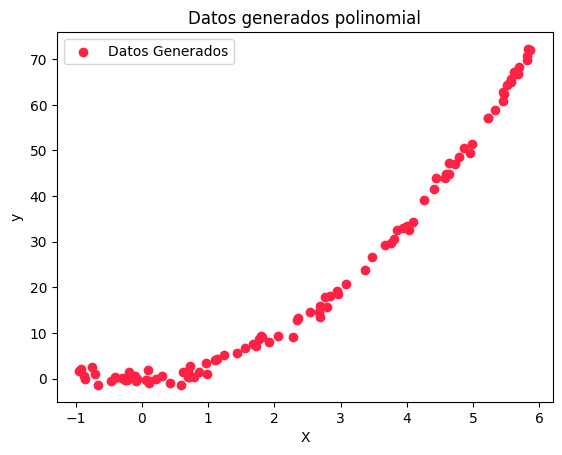

In [6]:
plt.scatter(X,y,color='#FF2244',label='Datos Generados', marker='o')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos generados polinomial')
plt.legend()
plt.show()

In [8]:
#trabajamos el grado del polinomio
#include_bias=False, no saca el 1 de la matriz
poly_caracteristicas= PolynomialFeatures(degree=2, include_bias=True)
#Cambiar el grado de las X
X_polynomion= poly_caracteristicas.fit_transform(X)
pd.DataFrame(X_polynomion).head()


,0,1,2
0,1.0,2.790065,7.784462
1,1.0,4.639478,21.524758
2,1.0,1.559691,2.432636
3,1.0,3.364417,11.319298
4,1.0,0.296765,0.088070


In [9]:
#realizamos el entrenamiento
modelo_lineal= LinearRegression()
#entrena para sacar los Theta, y arrojar el modelo
modelo_lineal.fit(X_polynomion,y)

LinearRegression()

In [10]:
#se realiza la predicción de datos
y_pred=modelo_lineal.predict(X_polynomion)
pd.DataFrame(y_pred).head()

,0
0,17.102668
1,45.475208
2,5.763504
3,24.457483
4,0.387043


In [11]:
#Generar datos en el  rango de X original (-1,6)
X_nuevo= np.linspace(-1,6,100).reshape(100,1)
pd.DataFrame(X_nuevo).head()

,0
0,-1.000000
1,-0.929293
2,-0.858586
3,-0.787879
4,-0.717172


In [12]:
#estádisticas del dato nuevo
pd.DataFrame(X_nuevo).describe()

,0
count,100.000000
mean,2.500000
std,2.051318
min,-1.000000
25%,0.750000
50%,2.500000
75%,4.250000
max,6.000000


In [13]:
#transformo los datos generados, en el rango de x de los datos originales, al grado del polinomio
X_nuevoPolinomio= poly_caracteristicas.fit_transform(X_nuevo)
y_nuevo= modelo_lineal.predict(X_nuevoPolinomio)
y_nuevo

array([[1.46826463e+00],
       [1.23689186e+00],
       [1.02540591e+00],
       [8.33806775e-01],
       [6.62094457e-01],
       [5.10268956e-01],
       [3.78330273e-01],
       [2.66278407e-01],
       [1.74113360e-01],
       [1.01835129e-01],
       [4.94437164e-02],
       [1.69391212e-02],
       [4.32134362e-03],
       [1.15903836e-02],
       [3.87462411e-02],
       [8.57889162e-02],
       [1.52718409e-01],
       [2.39534719e-01],
       [3.46237847e-01],
       [4.72827792e-01],
       [6.19304555e-01],
       [7.85668136e-01],
       [9.71918534e-01],
       [1.17805575e+00],
       [1.40407978e+00],
       [1.64999063e+00],
       [1.91578830e+00],
       [2.20147279e+00],
       [2.50704409e+00],
       [2.83250221e+00],
       [3.17784715e+00],
       [3.54307891e+00],
       [3.92819748e+00],
       [4.33320287e+00],
       [4.75809508e+00],
       [5.20287411e+00],
       [5.66753995e+00],
       [6.15209261e+00],
       [6.65653209e+00],
       [7.18085839e+00],


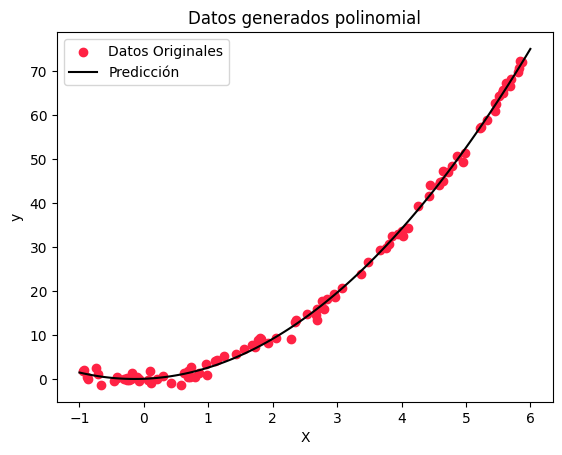

In [14]:
#graficamos, los datos originales, con la predicción, en el mismo rango
plt.scatter(X,y,color='#FF2244',label='Datos Originales', marker='o')
plt.plot(X_nuevo,y_nuevo,color='#000000',label='Predicción')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos generados polinomial')
plt.legend()
plt.show()

In [15]:
#llamo a la biblioteca de calcular que tan exacto es el modelo
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.998329226329692